In [1]:
import numpy as np
import jax.numpy as jnp
from jax import grad
import matplotlib.pyplot as plt

In [2]:
def free_exact(Tval):
    betaval = 1/Tval
    
    maglambda = 1/(jnp.sinh(2*betaval)**2) # mag field (quantum Ising) from temp (classical Ising)
    
    # 使用梯形法则计算定积分
    N = 1000
    x = jnp.linspace(0,np.pi,N+1)
    y = jnp.log(jnp.cosh(2*betaval)*jnp.cosh(2*betaval) + (1/maglambda)*jnp.sqrt(
            1+maglambda**2 -2*maglambda*np.cos(2*x)))
    return -Tval*((np.log(2)/2) + 0.25*sum(y[1:(N+1)] + y[:N])/N)

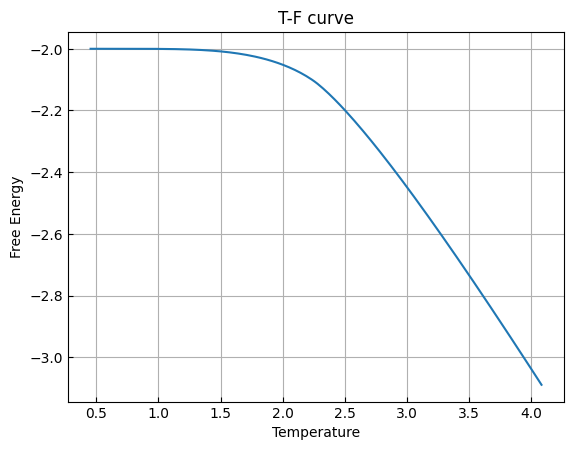

In [3]:
Tc = (2/np.log(1+np.sqrt(2)))

relTemp = np.linspace(0.2, 1.8, 160)
T = relTemp*Tc
y = []

for i in range(160):
    y.append(free_exact(T[i]))

# 绘制曲线
plt.plot(T, y)

plt.tick_params(direction='in') 

# 添加网格线
plt.grid(True)

# 添加标签和标题
plt.xlabel('Temperature')
plt.ylabel('Free Energy')
plt.title('T-F curve')

# 显示图形
plt.show()

In [4]:
grad_grad_free_exact = grad(grad(free_exact))

grad_grad_y = []
for i in range(160):
    grad_grad_y.append(grad_grad_free_exact(T[i]))

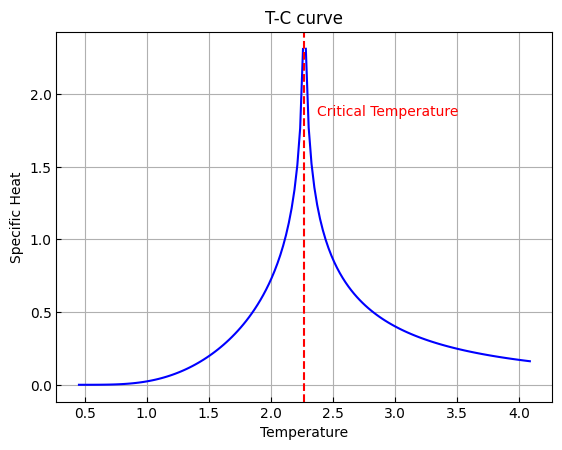

In [5]:
# 绘制曲线
T1 = T[T < Tc]
T2 = T[T > Tc]
C = np.array(grad_grad_y)
plt.plot(T1, -T1*C[T < Tc], color='b')
plt.plot(T2, -T2*C[T > Tc], color='b')

plt.tick_params(direction='in') 

plt.axvline(Tc, color='r', linestyle='--', label='Critical Temperature')
plt.text(Tc+0.1, max(-T*C)*0.8, 'Critical Temperature', color='r')

# 添加网格线
plt.grid(True)

# 添加标签和标题
plt.xlabel('Temperature')
plt.ylabel('Specific Heat')
plt.title('T-C curve')

# 显示图形
plt.show()

In [6]:
M = []
for i in range(160):
    maglambda = 1/(np.sinh(2/T[i])**2) # mag field (quantum Ising) from temp (classical Ising)
    XExact = 0
    if maglambda < 1:
        XExact = (1 - np.sinh(2/T[i])**(-4))**(1/8)
    M.append(XExact)

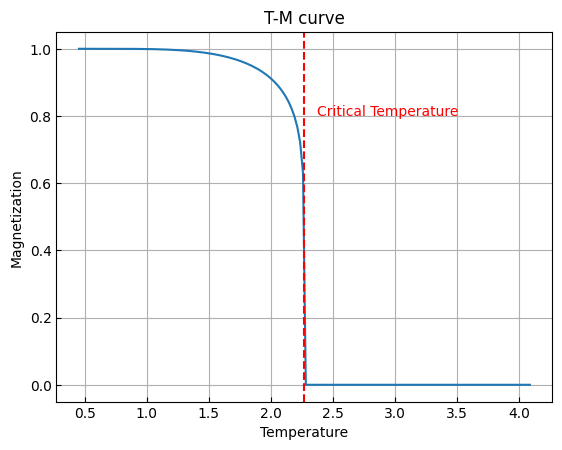

In [7]:
# 绘制曲线
plt.plot(T, M)

plt.tick_params(direction='in') 

# 添加网格线
plt.grid(True)

plt.axvline(Tc, color='r', linestyle='--', label='Critical Temperature')
plt.text(Tc+0.1, 0.8, 'Critical Temperature', color='r')

# 添加标签和标题
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.title('T-M curve')

# 显示图形
plt.show()